# Atividade 0 - Uso do Jupyter, Git, Matplotlib e Transformações Lineares

### **Descrição da Tarefa:**

Implemente, utilizando uma ferramenta do tipo Jupyter (ex.: Jupyter Notebook, JupyterLab, Google Colab), um notebook que demonstre:

1. **Rotação horária de 90°** e **shear (cisalhamento) em x**, diferentes dos exemplos apresentados em sala.
2. A **obtenção das matrizes de transformação** a partir dos **vetores unitários (bases)** — mostrando o processo **numericamente** e **graficamente** com o **Matplotlib**.
3. A **aplicação passo a passo** dessas matrizes a **dois vetores arbitrários**, com apresentação de resultados **numéricos** e **gráficos** no Matplotlib.

**Requisitos obrigatórios:**

- Uso de **ferramenta Jupyter-like** (Jupyter Notebook, Colab, etc.).
- Versionamento e entrega via **Git** (enviar o link do repositório).
- Trabalhos que não atendam a **todos** os requisitos acima **serão desconsiderados**.


1. Rotação Horária de 90°:

Parte 1: Obtenção da Matriz de rotação Precisamos ver para onde os vetores $\hat{i}$ e $\hat{j}$ vão parar após uma rotação de 90° no sentido horário.Vetor $\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$:Originalmente, ele aponta para a direita no eixo x.Ao girar 90° no sentido horário, ele passará a apontar para baixo, no eixo y.O novo $\hat{i}$ é $\begin{bmatrix} 0 \\ -1 \end{bmatrix}$.Vetor $\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$:Originalmente, ele aponta para cima no eixo y.Ao girar 90° no sentido horário, ele passará a apontar para a direita, no eixo x.O novo $\hat{j}$ é $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$.Juntando os dois, a nossa matriz de rotação $T_{rot}$ é:$$T_{rot} = \begin{bmatrix} \text{Novo } \hat{i} & \text{Novo } \hat{j} \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$$

2. Shear (Cisalhamento) em X. Um cisalhamento em x (horizontal) significa que cada ponto $(x, y)$ se move horizontalmente por uma quantidade proporcional à sua coordenada $y$.A fórmula geral é: $(x, y) \to (x + k \cdot y, y)$.Vamos escolher um fator $k=2$ (um valor diferente do $k=1$ comumente usado).Parte 1: Obtenção da Matriz $T_{shear}$ (com $k=2$)Vetor $\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$:Sua coordenada $y$ é 0.Aplicando a fórmula: $(1 + 2 \cdot 0, 0) \to (1, 0)$. O vetor não muda.O novo $\hat{i}$ é $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$.Vetor $\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$:Sua coordenada $y$ é 1.Aplicando a fórmula: $(0 + 2 \cdot 1, 1) \to (2, 1)$. O vetor "deita" para a direita.O novo $\hat{j}$ é $\begin{bmatrix} 2 \\ 1 \end{bmatrix}$.Juntando os dois, a nossa matriz de cisalhamento $T_{shear}$ é:$$T_{shear} = \begin{bmatrix} \text{Novo } \hat{i} & \text{Novo } \hat{j} \end{bmatrix} = \begin{bmatrix} 1 & 2 \\ 0 & 1 \end{bmatrix}$$

Para conseguir os vetores arbitrarios rotacionados e e cercilhados é so multiplica-los pelas respectivas matrizes.

Vetores base: vetor_i_base=[1 0], vetor_j_base=[0 1]
Vetores arbitrários: vetor_1=[4 6], vetor_2=[-1  2]

PARTE A: ROTAÇÃO HORÁRIA DE 90°

A.1: Obtendo a Matriz de Rotação (matriz_rotacao)
Matriz de Rotação matriz_rotacao:
[[ 0  1]
 [-1  0]]

vetor_i_base original [1, 0] se torna -> [ 0 -1]
vetor_j_base original [0, 1] se torna -> [1 0]


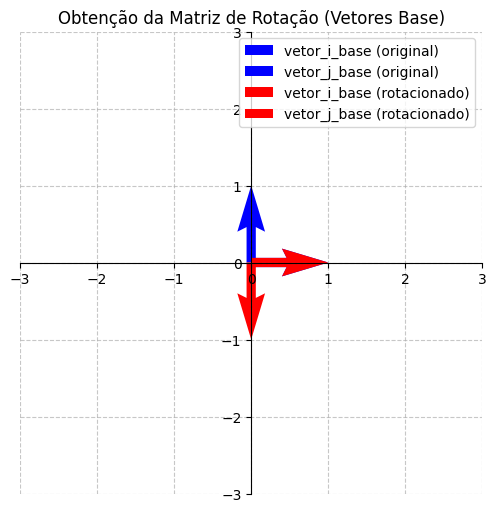


A.2: Aplicando matriz_rotacao aos vetores arbitrários
Vetor 1 original: [4 6] -> Rotacionado: [ 6 -4]
Vetor 2 original: [-1  2] -> Rotacionado: [2 1]


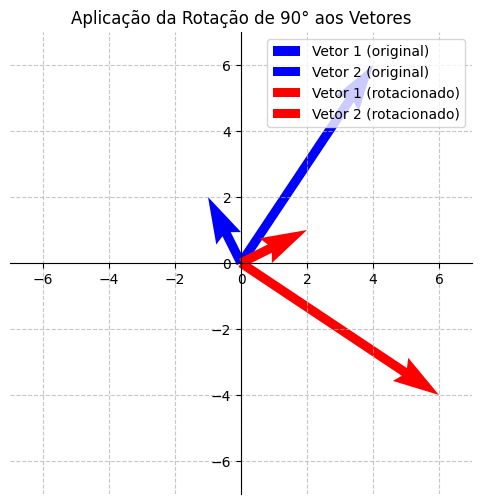

PARTE B: CISALHAMENTO EM X (fator=2)

B.1: Obtendo a Matriz de Cisalhamento (matriz_cisalhamento)
Matriz de Cisalhamento matriz_cisalhamento:
[[1 2]
 [0 1]]

vetor_i_base original [1, 0] se torna -> [1 0]
vetor_j_base original [0, 1] se torna -> [2 1]


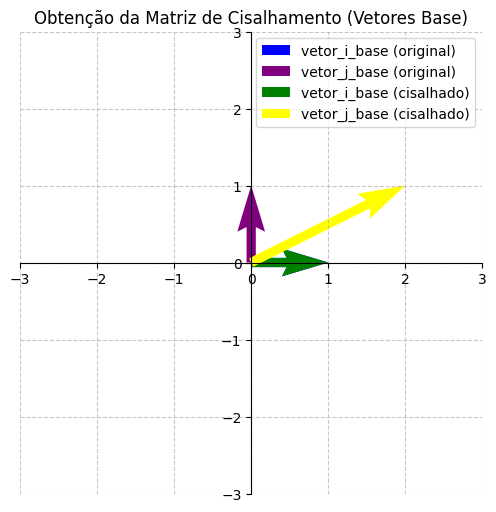


B.2: Aplicando matriz_cisalhamento aos vetores arbitrários
Vetor 1 original: [4 6] -> Cisalhado: [16  6]
Vetor 2 original: [-1  2] -> Cisalhado: [3 2]


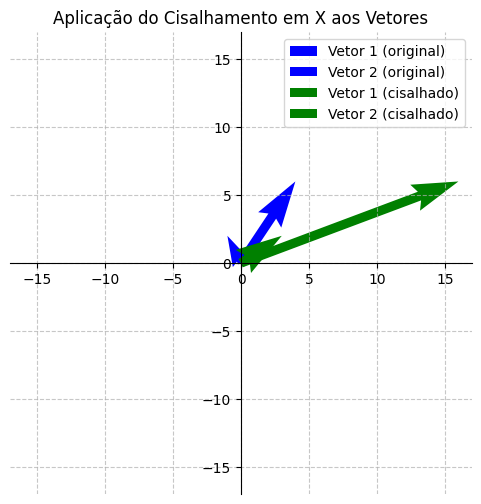

RESUMO DOS RESULTADOS

--- Rotação de 90° ---
Matriz: [[0, 1], [-1, 0]]
vetor_1: [4, 6] → [6, -4]
vetor_2: [-1, 2] → [2, 1]

--- Cisalhamento em X ---
Matriz: [[1, 2], [0, 1]]
vetor_1: [4, 6] → [16, 6]
vetor_2: [-1, 2] → [3, 2]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

#Função pra plotar os vetores
def plotar_vetores(vetores, cores, rotulos, titulo="Transformação de Vetores"):

    # Define um tamanho bom para o gráfico
    plt.figure(figsize=(6, 6))
    ax = plt.gca()

    # Plota cada vetor
    for vetor, cor, rotulo in zip(vetores, cores, rotulos):
        # O vetor começa em (0,0) e vai até (vetor[0], vetor[1])
        ax.quiver(0, 0, vetor[0], vetor[1], angles='xy', scale_units='xy',
                 scale=1, color=cor, label=rotulo, width=0.02)

    # Define os limites do gráfico para ficar visível
    # Encontra o maior valor absoluto em todos os vetores para definir os eixos
    valor_maximo = max(np.max(np.abs(vetores)), 2)  # Garante que o gráfico tenha pelo menos -2 a 2, pq obviamente ta nesse intervalo
    ax.set_xlim([-valor_maximo - 1, valor_maximo + 1])
    ax.set_ylim([-valor_maximo - 1, valor_maximo + 1])

    # Desenha os eixos x e y
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Adiciona uma grade
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.title(titulo)
    plt.gca().set_aspect('equal', adjustable='box')  # Garante que os eixos tenham a mesma escala
    plt.show()


# 2. DEFINIÇÃO DOS VETORES DE BASE E ARBITRÁRIOS

# Vetores da base original (usando numpy)
vetor_i_base = np.array([1, 0])  # Vetor unitário na direção x
vetor_j_base = np.array([0, 1])  # Vetor unitário na direção y

# Vetores arbitrários para teste
vetor_1 = np.array([4, 6])
vetor_2 = np.array([-1, 2])

print(f"Vetores base: vetor_i_base={vetor_i_base}, vetor_j_base={vetor_j_base}")
print(f"Vetores arbitrários: vetor_1={vetor_1}, vetor_2={vetor_2}\n")

# PARTE A: ROTAÇÃO HORÁRIA DE 90°

print("PARTE A: ROTAÇÃO HORÁRIA DE 90°")


# --- A.1: Obtenção da Matriz (Numérico e Gráfico) ---

print("\nA.1: Obtendo a Matriz de Rotação (matriz_rotacao)")

# Matriz de rotação horária de 90 graus
matriz_rotacao = np.array([
    [0, 1],
    [-1, 0]
])

# Aplicar rotação aos vetores base
vetor_i_rotacionado = matriz_rotacao @ vetor_i_base
vetor_j_rotacionado = matriz_rotacao @ vetor_j_base

print(f"Matriz de Rotação matriz_rotacao:\n{matriz_rotacao}\n")
print(f"vetor_i_base original [1, 0] se torna -> {vetor_i_rotacionado}")
print(f"vetor_j_base original [0, 1] se torna -> {vetor_j_rotacionado}")

# Plotando a transformação da base
plotar_vetores(
    [vetor_i_base, vetor_j_base, vetor_i_rotacionado, vetor_j_rotacionado],
    ['blue', 'blue', 'red', 'red'],
    ['vetor_i_base (original)', 'vetor_j_base (original)',
     'vetor_i_base (rotacionado)', 'vetor_j_base (rotacionado)'],
    titulo="Obtenção da Matriz de Rotação (Vetores Base)"
)

# --- A.2: Aplicação da Matriz (Numérico e Gráfico) ---

print("\nA.2: Aplicando matriz_rotacao aos vetores arbitrários")

# Aplicando a rotação aos vetores arbitrários
vetor_1_rotacionado = matriz_rotacao @ vetor_1
vetor_2_rotacionado = matriz_rotacao @ vetor_2

print(f"Vetor 1 original: {vetor_1} -> Rotacionado: {vetor_1_rotacionado}")
print(f"Vetor 2 original: {vetor_2} -> Rotacionado: {vetor_2_rotacionado}")

# Plotando a transformação dos vetores arbitrários
plotar_vetores(
    [vetor_1, vetor_2, vetor_1_rotacionado, vetor_2_rotacionado],
    ['blue', 'blue', 'red', 'red'],
    ['Vetor 1 (original)', 'Vetor 2 (original)',
     'Vetor 1 (rotacionado)', 'Vetor 2 (rotacionado)'],
    titulo="Aplicação da Rotação de 90° aos Vetores"
)

# PARTE B: SHEAR (CISALHAMENTO) EM X


print("PARTE B: CISALHAMENTO EM X (fator=2)")


# --- B.1: Obtenção da Matriz (Numérico e Gráfico) ---

print("\nB.1: Obtendo a Matriz de Cisalhamento (matriz_cisalhamento)")

# Matriz de cisalhamento em x com fator 2
matriz_cisalhamento = np.array([
    [1, 2],
    [0, 1]
])

# Aplicar cisalhamento aos vetores base
vetor_i_cisalhado = matriz_cisalhamento @ vetor_i_base
vetor_j_cisalhado = matriz_cisalhamento @ vetor_j_base

print(f"Matriz de Cisalhamento matriz_cisalhamento:\n{matriz_cisalhamento}\n")
print(f"vetor_i_base original [1, 0] se torna -> {vetor_i_cisalhado}")
print(f"vetor_j_base original [0, 1] se torna -> {vetor_j_cisalhado}")

# Plotando a transformação da base
plotar_vetores(
    [vetor_i_base, vetor_j_base, vetor_i_cisalhado, vetor_j_cisalhado],
    ['blue', 'blue', 'green', 'green'],
    ['vetor_i_base (original)', 'vetor_j_base (original)',
     'vetor_i_base (cisalhado)', 'vetor_j_base (cisalhado)'],
    titulo="Obtenção da Matriz de Cisalhamento (Vetores Base)"
)

# --- B.2: Aplicação da Matriz (Numérico e Gráfico) ---

print("\nB.2: Aplicando matriz_cisalhamento aos vetores arbitrários")

# Aplicando o cisalhamento aos vetores arbitrários
vetor_1_cisalhado = matriz_cisalhamento @ vetor_1
vetor_2_cisalhado = matriz_cisalhamento @ vetor_2

print(f"Vetor 1 original: {vetor_1} -> Cisalhado: {vetor_1_cisalhado}")
print(f"Vetor 2 original: {vetor_2} -> Cisalhado: {vetor_2_cisalhado}")

# Plotando a transformação dos vetores arbitrários
plotar_vetores(
    [vetor_1, vetor_2, vetor_1_cisalhado, vetor_2_cisalhado],
    ['blue', 'blue', 'green', 'green'],
    ['Vetor 1 (original)', 'Vetor 2 (original)',
     'Vetor 1 (cisalhado)', 'Vetor 2 (cisalhado)'],
    titulo="Aplicação do Cisalhamento em X aos Vetores"
)

# 3. RESUMO DOS RESULTADOS


print("RESUMO DOS RESULTADOS")


print("\n--- Rotação de 90° ---")
print(f"Matriz: {matriz_rotacao.tolist()}")
print(f"vetor_1: {vetor_1.tolist()} → {vetor_1_rotacionado.tolist()}")
print(f"vetor_2: {vetor_2.tolist()} → {vetor_2_rotacionado.tolist()}")

print("\n--- Cisalhamento em X ---")
print(f"Matriz: {matriz_cisalhamento.tolist()}")
print(f"vetor_1: {vetor_1.tolist()} → {vetor_1_cisalhado.tolist()}")
print(f"vetor_2: {vetor_2.tolist()} → {vetor_2_cisalhado.tolist()}")
